## Goal: improve performance of saxskit.saxs_math.spherical_normal_saxs()
(reduce the execution time while keeping reasonable accuracy)

In [1]:
import numpy as np
import pandas as pd
from time import time

In [2]:
from saxskit.saxs_math import spherical_normal_saxs # Compute SAXS intensity of a normally-distributed sphere population

spherical_normal_saxs() takes three required arguments: q (scattering vector array), r0 (mean sphere radius), and sigma (fractional standard deviation of sphere radii). 

Originally, spherical_normal_saxs() sampled sphere radii within **5** standard deviations of the mean, with a sampling resolution of **0.02** standard deviations. The intuition is that it is possible to have about the same accuracy using a smaller range and larger resolution. **This notebook seeks a smaller value for the range and larger value for the resolution, without significantly compromising the precision**. 

#### For this benchmark, we use a q-array from 0 to 0.5 1/Angstrom, with a step of 0.001 1/Angstrom.

In [6]:
q = np.arange(0, 0.5, 0.001)

#### We choose 10 r0 and 10 sigma values, totaling 100 size distributions for the benchmark. 

In [7]:
r0 = [1,5,20,25,30,50,100,200,1000]
sigma = [0.01, 0.05, 0.1,0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

#### Compute spherical_normal_saxs() with high sampling on all 100 distributions, and time it:

In [29]:
I = []
t0 = time()
for r in r0:
    for s in sigma:
        I.append(spherical_normal_saxs(q,r,s, 5, 0.02))
print('time for computing spherical_normal_saxs()',
      'for all distributions, with high sampling:', 
      (time()-t0), "seconds.")

time for computing spherical_normal_saxs() for all distributions, with high sampling: 5.112440347671509 seconds.


Execution of spherical_normal_saxs() with high sampling takes several seconds (depends on computer). Let's try some different values the range and sampling resolution:

In [9]:
samp_width = np.arange(1, 5.5, 0.5)
samp_res = np.arange(0.02, 0.3, 0.02)

Now we can collect statistics about execution time and accuracy using different sampling:

In [11]:
stat = []
n_samp = len(r0) * len(sigma)
n_qpts = len(q)
for w in samp_width:
    for res in samp_res:
        I_new = []
        t0 = time()
        for r in r0:
            for s in sigma:
                I_new.append(spherical_normal_saxs(q,r,s,w,res))
        t = time()-t0

        #compare the result with the result that we got using high sampling:
        max_diff = [max(np.absolute(I[i]-I_new[i])) for i in range(n_samp)]
        abs_error = [sum(np.absolute(I[i]-I_new[i]))/n_qpts for i in range(n_samp)]
        max_abs_log_error = [max(np.log10(I[i])-np.log10(I_new[i])) for i in range(n_samp)]
        
        stat.append([w, res, t, np.mean(max_diff), np.mean(abs_error), np.mean(max_abs_log_error)])
stat = np.array(stat)

## Visualisation of the results

TODO: Make these plots with colored lines and add legends

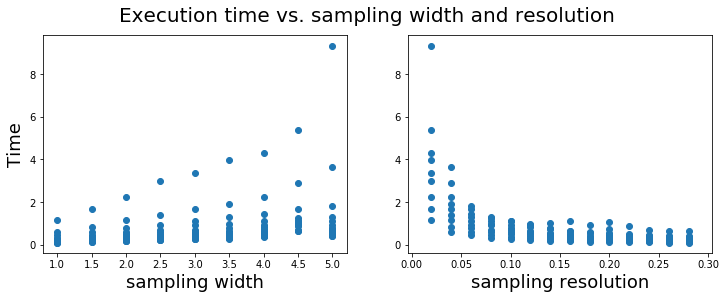

In [18]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
st = fig.suptitle("Execution time vs. sampling width and resolution", fontsize=20)

axes[0].scatter(stat[ : ,0],stat[ : ,2])
axes[1].scatter(stat[ : ,1],stat[ : ,2])
axes[0].set_ylabel('Time', fontsize=18)
axes[1].yaxis.label.set_visible(False) 
axes[0].set_xlabel('sampling width',fontsize=18)
axes[1].set_xlabel('sampling resolution', fontsize=18);

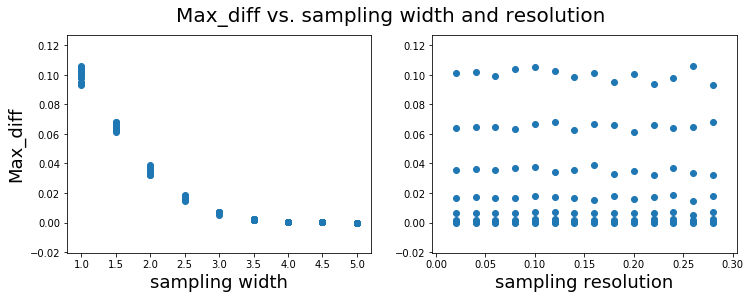

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
st = fig.suptitle("Max_diff vs. sampling width and resolution", fontsize=20)

axes[0].scatter(stat[ : ,0],stat[ : ,3])
axes[1].scatter(stat[ : ,1],stat[ : ,3])
axes[0].set_ylabel('Max_diff', fontsize=18)
axes[1].yaxis.label.set_visible(False) 
axes[0].set_xlabel('sampling width',fontsize=18)
axes[1].set_xlabel('sampling resolution', fontsize=18);

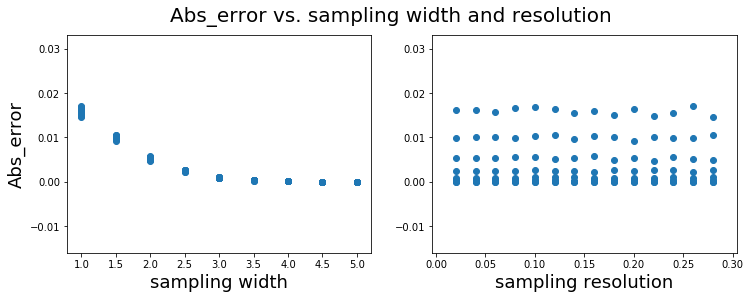

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
st = fig.suptitle("Abs_error vs. sampling width and resolution", fontsize=20)

axes[0].scatter(stat[ : ,0],stat[ : ,4])
axes[1].scatter(stat[ : ,1],stat[ : ,4])
axes[0].set_ylabel('Abs_error', fontsize=18)
axes[1].yaxis.label.set_visible(False) 
axes[0].set_xlabel('sampling width',fontsize=18)
axes[1].set_xlabel('sampling resolution', fontsize=18);

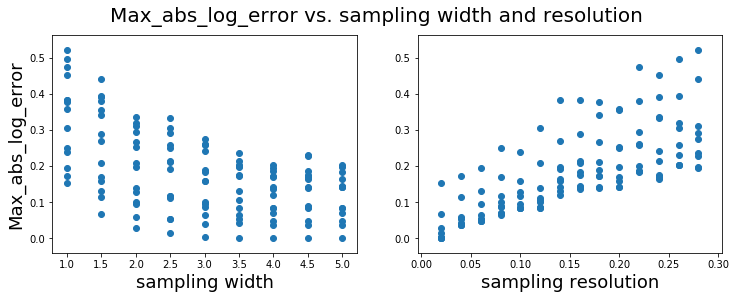

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
st = fig.suptitle("Max_abs_log_error vs. sampling width and resolution", fontsize=20)

axes[0].scatter(stat[ : ,0],stat[ : ,5])
axes[1].scatter(stat[ : ,1],stat[ : ,5])
axes[0].set_ylabel('Max_abs_log_error', fontsize=18)
axes[1].yaxis.label.set_visible(False) 
axes[0].set_xlabel('sampling width',fontsize=18)
axes[1].set_xlabel('sampling resolution', fontsize=18);

#### Analyzing the data above, we choose a sampling width of 3.5 standard deviations, and a resolution of 0.25 standard deviations.

TODO: Justify this choice numerically

In [31]:
I_new = []
t0 = time()
for r in r0:
    for s in sigma:
        I_new.append(spherical_normal_saxs(q,r,s,3.5,0.25))
print('time for computing spherical_normal_saxs()',
      'for all distributions, with new sampling:', 
      (time()-t0), "seconds.")

time for computing spherical_normal_saxs() for all distributions, with new sampling: 0.33002781867980957 seconds.


In [32]:
I = [] # I calculated with original coefficients
for r in r0:
    for s in sigma:
        I.append(spherical_normal_saxs(q,r,s, 5, 0.02))


max_abs_log_error = []
for i in range(100):
    max_abs_log_error.append(max(np.log10(I[i]) - np.log10(I_new[i])))
    
np.mean(max_abs_log_error)

IndexError: list index out of range

###  coef1 = 3 and coef2 = 0.25

In [27]:
I_new = []# I_new calculated with new coefficients
t0 = time()
for r in r0:
    for s in sigma:
        I_new.append(spherical_normal_saxs(q,r,s, 3, 0.25))
print("Executing of original function 100 times took about", (time()-t0), " seconds.")

Executing of original function 100 times took about 0.16658926010131836  seconds.


In [28]:
max_abs_log_error = []
for i in range(100):
    max_abs_log_error.append(max(np.log10(I[i]) - np.log10(I_new[i])))
    
np.mean(max_abs_log_error)

0.010954194138128348

## Conclusion

We set the default sampling parameters at **3.5** standard deviations, with a sampling resolution of **0.25** standard deviations. **This provides about 16 times faster execution without losing much accuracy**.